# Classes and perceptron

This notebook introduces the concept of classes in Python and demonstrates their application in building a simple Perceptron, a pytorch neural network.

### What are classes?
Classes in Python are like blueprints for creating objects. They let us bundle data (attributes) and functions (methods) together in a neat package. In the context of neural networks, we use classes to define models—like a Perceptron or an MLP—making our code organized and reusable.

### Why use classes?
- **Structure**: Classes help us organize related elements (e.g., weights, forward logic) together in one place.
- **Reusability**: Once defined, we can create multiple instances (objects) of a class.
- **PyTorch Connection**: PyTorch uses classes (via `nn.Module`) to build neural networks.

### How do they work?
A class has:
- An initiator method `__init__` to set up initial attributes (like weights).
- Other methods (like `forward`) to define what the class does.

Let’s see two examples: a simple Perceptron and a PyTorch-style network.

## A simple perceptron
- **The `Perceptron` Class**: This is like a tiny decision-maker. It sets up random "weights" and a "bias" when created.
- **The `forward` Method**: It takes an input (like `[1.0, 2.0]`), mixes it with weights and bias, and decides "yes" (1) or "no" (-1) using a simple rule.
- **Testing It**: We create a Perceptron, give it an input, and see what it says—super simple!

In [ ]:
import torch
import torch.nn as nn

class Perceptron:
    def __init__(self, input_size):
        # Initialize random weights and bias
        self.weights = torch.randn(input_size)
        self.bias = torch.randn(1)
    
    def forward(self, x):
        # Compute the output: sign of (weights * input + bias)
        return torch.sign(torch.dot(x, self.weights) + self.bias)

# Test the Perceptron
my_perceptron = Perceptron(input_size=2)  # Create an instance with 2 inputs
sample_input = torch.tensor([5.0, 2.0])
output = my_perceptron.forward(sample_input)
print("Perceptron output:", output)

## A PyTorch neural network
- **The `SimpleNet` Class**: A simple neural network built with PyTorch. It sets up two "layers" of connections: one from inputs to a hidden layer (like a middle step), and another from the hidden layer to the output.
- **The `forward` Method**: This tells the network how to process an input—it passes it through the first layer, adds a twist with ReLU, then goes through the second layer to get the final result.
- **Testing It**: We create a `SimpleNet`, give it an input (like `[1.0, 2.0]`), and see what it predicts—nice and straightforward!


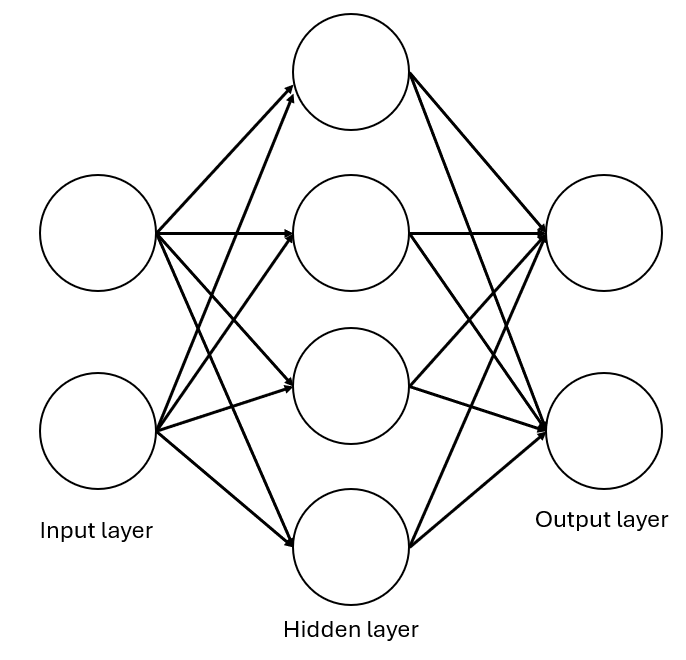

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()  # Initialize the parent nn.Module class
        self.layer1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.layer2 = nn.Linear(hidden_size, output_size)  # Hidden to output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        # Define the forward pass with ReLU activation
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

sample_input = torch.tensor([1.0, 2.0])
# Test the SimpleNet
net = SimpleNet(input_size=2, hidden_size=4, output_size=2)  # Create an instance
output = net(sample_input)
print("SimpleNet output:", output)